<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_2_1_4_Lab_Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Multiple linear regression

## Imports

In [1]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Notation

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
                                        ||
|  $\mathbf{X}$ | training example matrix                  | `X_train` |   
|  $\mathbf{y}$  | training example  targets                | `y_train`
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at $\mathbf{x^{(i)}}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` |

## Problem Statement

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses.

## `X_train`

$\mathbf{X}$ is an $m \times n$ matrix:

$$
\mathbf{X} =
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1}
\end{pmatrix}
$$

notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
    - `X_train[i]`
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  
    - `X_train[i,j]`

## Input data

In [2]:
X_train = np.array([[2104, 5, 1, 45],
                    [1416, 3, 2, 40],
                    [852, 2, 1, 35]])

X_train

array([[2104,    5,    1,   45],
       [1416,    3,    2,   40],
       [ 852,    2,    1,   35]])

In [3]:
y_train = np.array([460, 232, 178])
y_train

array([460, 232, 178])

## Parameter vector $\mathbf{w}$ and scalar $b$

$$\mathbf{w} = \begin{pmatrix}
w_0 \\
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$

- In our case we have $n = 4$ features
    - we need a weight for each feature
- $w$ is a column vector
- $b$ is a scalar

## Use sklearn to get ideal parameters for testing

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
w_init = model.coef_ # same as w_init above
w_init

array([  0.39133535,  18.75376741, -53.36032453, -26.42131618])

In [6]:
b_init = model.intercept_ # same as b_init above
b_init

785.1811367994081

In [7]:
# but I'll use w_init, b_init provided by
# the lab so that the results match
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
b_init = 785.1811367994083

## Model Prediction

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$

### Single Prediction: loop (not vectorized)

In [8]:
def predict_single_loop(x, w, b):
    """
    single predict using linear regression

    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):  model parameter

    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

# test function using ideal parameters
x_vec = X_train[0,:] # first row of our training data
predict_single_loop(x_vec, w_init, b_init)

459.9999976194083

### Single Prediction: vectorized

In [9]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p = w.dot(x) + b
    return p

In [10]:
predict(x_vec, w_init, b_init)

459.9999976194083

In [11]:
# with sklearn
model.predict(X_train[0,:].reshape(1, -1))

array([460.])

## Compute Cost with Multiple Variables

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b$$


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [12]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = w.dot(X[i]) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost


# test function using ideal parameters
compute_cost(X_train, y_train, w_init, b_init)

1.5578904428966628e-12

## Gradient Descent with Multiple Variables

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [13]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0.0

    for i in range(m):
        err = w.dot(X[i]) + b - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

# test function using ideal parameters
compute_gradient(X_train, y_train, w_init, b_init)

(-1.6739251501955248e-06,
 array([-2.72623577e-03, -6.27197263e-06, -2.21745578e-06, -6.92403391e-05]))

## Gradient Descent with Multiple Variables

In [14]:
def gradient_descent(X, y, w_in, b_in, f_cost, f_gradient, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
    """
    J_history = []
    w = copy.deepcopy(w_in) # avoid modify global w within function
    b = b_in

    for i in range(num_iters):
        # calculate the gradient
        dj_db, dj_dw = f_gradient(X, y, w, b)

        # update the parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100_000: # prevent resource exhaustion
            J_history.append(f_cost(X, y, w, b))

        # print cost
        if i % math.ceil(num_iters / 10) == 0:
            print(f'Iteration {i:4d}: Cost {J_history[-1]:8.2f}')

    return w, b, J_history

In [15]:
initial_w = np.zeros_like(w_init)
initial_b = 0.0
iterations = 1000
alpha = 5.0e-7

# run gradient_descent
w_final, b_final, J_hist = gradient_descent(X_train,
                                            y_train,
                                            initial_w,
                                            initial_b,
                                            compute_cost,
                                            compute_gradient,
                                            alpha,
                                            iterations)

Iteration    0: Cost  2529.46
Iteration  100: Cost   695.99
Iteration  200: Cost   694.92
Iteration  300: Cost   693.86
Iteration  400: Cost   692.81
Iteration  500: Cost   691.77
Iteration  600: Cost   690.73
Iteration  700: Cost   689.71
Iteration  800: Cost   688.70
Iteration  900: Cost   687.69


### Using our weights to make a prediction

In [16]:
b_final, w_final

(-0.002235407530932535,
 array([ 0.20396569,  0.00374919, -0.0112487 , -0.0658614 ]))

In [17]:
for i in range(X_train.shape[0]):
    y_pred = predict(X_train[i], w_final, b_final)
    print(y_pred)

426.18530497189204
286.1674720078562
171.46763087132317


### Compare our weights to the ideal weights

In [18]:
b_init, w_init

(785.1811367994083,
 array([  0.39133535,  18.75376741, -53.36032453, -26.42131618]))

In [19]:
for i in range(X_train.shape[0]):
    y_pred = predict(X_train[i], w_init, b_init)
    print(y_pred)

459.9999976194083
231.9999983694081
177.99999898940814


## Cost vs. iterations of gradient descent

- It is useful to plot the initial iterations on a different scale than the final iterations

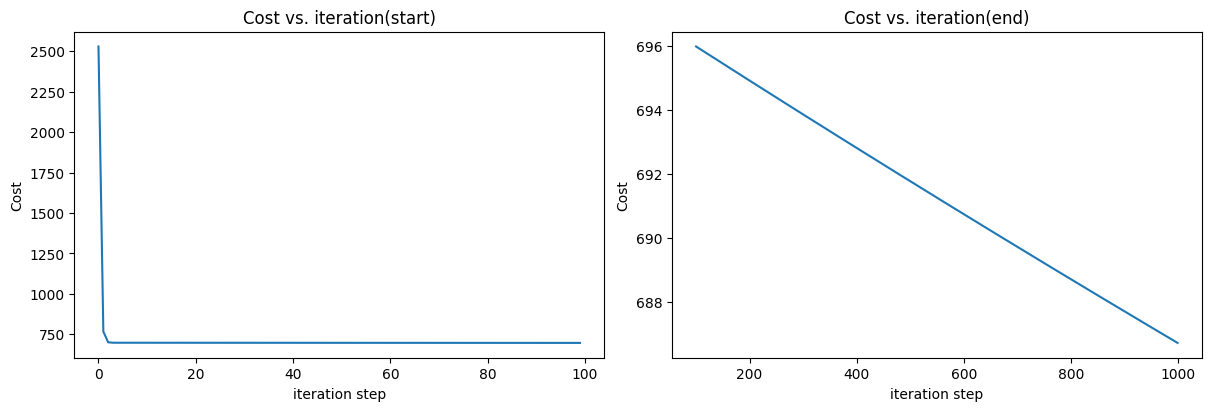

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

ax1.plot(J_hist[:100])
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])

ax1.set_title('Cost vs. iteration(start)')
ax2.set_title('Cost vs. iteration(end)')

ax1.set_xlabel('iteration step')
ax2.set_xlabel(ax1.get_xlabel())

ax1.set_ylabel('Cost')
ax2.set_ylabel(ax1.get_ylabel())

plt.show()